In [1]:
import logging
import os

import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from gammapy.datasets import Datasets, MapDataset
from gammapy.modeling.models import Models, PowerLawSpectralModel

from asgardpy.analysis import AsgardpyAnalysis
from asgardpy.config import AsgardpyConfig

In [2]:
from asgardpy.base.geom import create_counts_map, get_source_position
from asgardpy.base.reduction import (
    get_exclusion_region_mask,
)
from asgardpy.data.dataset_3d import Dataset3DGeneration
from asgardpy.data.target import apply_selection_mask_to_models

In [3]:
# os.environ['GAMMAPY_DATA']

In [4]:
log = logging.getLogger("test 3d dataset")

In [5]:
config_file = "../src/asgardpy/tests/config_hawc.yaml"

In [6]:
config = AsgardpyConfig()

In [7]:
%%time
config_main = config.read(config_file)

CPU times: user 23.9 ms, sys: 0 ns, total: 23.9 ms
Wall time: 22.9 ms


# Update path of test data

In [8]:
config_main.dataset3d.instruments[0].input_dl3[
    0
].input_dir = f"{os.environ['GAMMAPY_DATA']}hawc/crab_events_pass4/"
# config_main.dataset3d.instruments[0].input_dl3[1].input_dir = f"{os.environ['GAMMAPY_DATA']}fermipy-crab/"
# config_main.dataset1d.instruments[0].input_dl3[0].input_dir = f"{os.environ['GAMMAPY_DATA']}hess-dl3-dr1/"

In [9]:
config_main.general.model_dump()

{'log': {'level': 'info',
  'filename': '',
  'filemode': 'w',
  'format': '',
  'datefmt': ''},
 'outdir': PosixPath('..'),
 'n_jobs': 10,
 'parallel_backend': 'multiprocessing',
 'steps': ['datasets-3d', 'datasets-1d', 'fit', 'flux-points'],
 'overwrite': True,
 'stacked_dataset': True}

# Steps mentioned in the main config file

In [10]:
config_main.general.steps

['datasets-3d', 'datasets-1d', 'fit', 'flux-points']

# Target source information

In [11]:
config_main.target.model_dump()

{'source_name': '4FGL J0534.5+2201i',
 'sky_position': {'frame': 'icrs',
  'lon': <Quantity 83.6338333 deg>,
  'lat': <Quantity 22.0145 deg>,
  'radius': <Quantity 0. deg>},
 'use_uniform_position': True,
 'models_file': PosixPath('.'),
 'datasets_with_fov_bkg_model': [],
 'use_catalog': {'name': '',
  'selection_radius': <Quantity 0. deg>,
  'exclusion_radius': <Quantity 0. deg>},
 'components': [{'name': '4FGL J0534.5+2201i',
   'type': 'SkyModel',
   'datasets_names': [''],
   'spectral': {'type': 'LogParabolaSpectralModel',
    'parameters': [{'name': 'amplitude',
      'value': 1e-06,
      'unit': 'cm-2 s-1 TeV-1',
      'error': 1.5e-07,
      'min': 1e-13,
      'max': 0.01,
      'frozen': False},
     {'name': 'reference',
      'value': 0.015,
      'unit': 'TeV',
      'error': 0.0,
      'min': 0.0001,
      'max': 100.0,
      'frozen': True},
     {'name': 'alpha',
      'value': 1.7,
      'unit': '',
      'error': 0.1,
      'min': 0.5,
      'max': 5.0,
      'frozen

# 3D Datasets informations

In [10]:
config_main.dataset3d.model_dump()

{'type': '3d',
 'instruments': [{'name': 'HAWC',
   'input_dl3': [{'type': 'hawc',
     'input_dir': PosixPath('/home/chaitanya/software/gammapy-datasets/1.2/hawc/crab_events_pass4'),
     'glob_pattern': {'en_est': '*NN*fits.gz',
      'transit': 'irfs/TransitsMap*fits.gz'}}],
   'input_dl4': False,
   'dataset_info': {'name': 'HAWC',
    'key': [],
    'observation': {'obs_ids': [],
     'event_type': [5, 6, 7, 8, 9],
     'obs_file': PosixPath('.'),
     'obs_time': [],
     'obs_cone': {'frame': 'icrs',
      'lon': <Quantity 0. deg>,
      'lat': <Quantity 0. deg>,
      'radius': <Quantity 0. deg>},
     'required_irfs': ['aeff']},
    'map_selection': ['counts', 'background', 'exposure', 'edisp', 'psf'],
    'geom': {'wcs': {'skydir': {'frame': 'icrs',
       'lon': <Quantity 0. deg>,
       'lat': <Quantity 0. deg>,
       'radius': <Quantity 0. deg>},
      'binsize': <Quantity 0.02 deg>,
      'proj': 'TAN',
      'map_frame_shape': {'width': <Quantity 6. deg>,
       'height

In [13]:
config_main.fit_params.model_dump()

{'fit_range': {'min': <Quantity 1. GeV>, 'max': <Quantity 40. TeV>},
 'backend': 'minuit',
 'optimize_opts': {},
 'covariance_opts': {},
 'confidence_opts': {},
 'store_trace': True}

In [9]:
%%time
analysis = AsgardpyAnalysis(config_main)

Setting logging config: {'level': 'INFO', 'filename': '', 'filemode': 'w', 'format': '', 'datefmt': ''}


CPU times: user 3.3 ms, sys: 24 μs, total: 3.32 ms
Wall time: 2.94 ms


In [38]:
analysis

In [10]:
analysis.run(["datasets-3d"])

Perform DL3 to DL4 process!
1 number of 3D Datasets given
No distinct keys used for the 3D dataset
Observation ID list selected: 103000133
Observations selected: 1 out of 1.


Preparing for fHit number  5


Observation ID list selected: 103000133
Observations selected: 1 out of 1.


Preparing for fHit number  6


Observation ID list selected: 103000133
Observations selected: 1 out of 1.


Preparing for fHit number  7


Observation ID list selected: 103000133
Observations selected: 1 out of 1.


Preparing for fHit number  8


Observation ID list selected: 103000133
Observations selected: 1 out of 1.


Preparing for fHit number  9


Analysis Step datasets-3d completed
Models have been associated with the Datasets


In [11]:
for d in analysis.datasets:
    print(d)

MapDataset
----------

  Name                            : nHit-5 

  Total counts                    : 7212 
  Total background counts         : 6999.17
  Total excess counts             : 212.83

  Predicted counts                : 14089.19
  Predicted background counts     : 6999.17
  Predicted excess counts         : 7090.01

  Exposure min                    : 2.33e+08 cm2 s
  Exposure max                    : 4.95e+13 cm2 s

  Number of total bins            : 900000 
  Number of fit bins              : 360000 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : 75060.94

  Number of models                : 1 
  Number of parameters            : 8
  Number of free parameters       : 3

  Component 0: SkyModel
  
    Name                      : 4FGL J0534.5+2201i
    Datasets names            : None
    Spectral model type       : CompoundSpectralModel
    Spatial  model type       : PointSpatialModel
    Temporal model type       : 
    Parameters:
     

In [12]:
analysis.datasets[0].exposure

In [13]:
print(analysis.datasets[0].psf)

WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat', 'rad', 'energy']
	shape : (30, 30, 66, 10)
	ndim  : 4
	unit  : 1 / deg2
	dtype : float64



In [20]:
analysis.datasets[0].psf.exposure_map = analysis.datasets[0].exposure

In [17]:
for d in analysis.datasets:
    # d.psf.exposure_map = d.exposure
    # g = d.psf.exposure_map.geom.squash("energy_true")
    # d.psf.exposure_map._geom = g #d.psf.exposure_map.geom.interp_to_geom(g.to_image())
    d.mask_safe = None

In [18]:
analysis.datasets.stack_reduce(name="HAWC")

ValueError: ('energy', 'should have only one bin')

In [15]:
print(analysis.datasets[0].mask_safe)
print(analysis.datasets[0].mask_safe_psf)
# exposure.geom.squash("energy_true")

WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat', 'energy']
	shape : (300, 300, 10)
	ndim  : 3
	unit  : 
	dtype : bool



ValueError: ('energy', 'should have only one bin')

In [11]:
analysis.datasets[0].meta.optional = None
analysis.datasets[0].write("../DL4_HAWC_Crab_5NN.fits", overwrite=True)

In [12]:
analysis.datasets[1].meta.optional = None
analysis.datasets[1].write("../DL4_HAWC_Crab_6NN.fits", overwrite=True)

IndexError: list index out of range

In [36]:
MapDataset.read("../DL4_HAWC_Crab_5NN.fits")

In [14]:
analysis.datasets

In [12]:
%%time
analysis.run(["fit", "flux-points"])

Perform DL4 to DL5 processes!
OptimizeResult

	backend    : minuit
	method     : migrad
	success    : False
	message    : Optimization failed. Call limit was reached.
	nfev       : 1382
	total stat : 63380.24

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

Analysis Step fit completed
Analysis Step flux-points completed
The Chi2/dof value of the goodness of Fit is 0.48/7
and the p-value is 9.995e-01 and in Significance 0.00 sigmas
with best fit TS (Observed) as 0.478 and max fit TS (Expected) as 0.000


CPU times: user 25.2 s, sys: 69.3 ms, total: 25.3 s
Wall time: 25.3 s


In [15]:
analysis.final_model

In [13]:
analysis.flux_points[0].plot(sed_type="e2dnde", color="red", label="HAWC")
analysis.datasets[0].models[config_main.target.source_name].spectral_model.plot(
    sed_type="e2dnde", energy_bounds=[1 * u.TeV, 400 * u.TeV]
)
analysis.datasets[0].models[config_main.target.source_name].spectral_model.plot_error(
    sed_type="e2dnde", energy_bounds=[1 * u.TeV, 400 * u.TeV]
)

plt.grid(which="both")
plt.legend()

IndexError: list index out of range

In [19]:
m5 = MapDataset.read("/home/chaitanya/software/gammapy-datasets/dev/hawc/DL4/nHit-5.fits.gz")
m6 = MapDataset.read("/home/chaitanya/software/gammapy-datasets/dev/hawc/DL4/nHit-6.fits.gz")

In [22]:
Datasets([m5, m6])

# Prepare for a single 3D Dataset, based on instrument and key_name
## Using Fermi-LAT data as example here. For GADF-compliant DL3 dataset, after loading the events into file_list["events_file"] follow similar steps as for test_dataset_1d_step

In [12]:
instruments_list = config_main.dataset3d.instruments
print(len(instruments_list), "number of 3D dataset information provided")

config_3d_dataset = instruments_list[0]
print(f"Instrument selected is {config_3d_dataset.name}")

1 number of 3D dataset information provided
Instrument selected is HAWC


In [13]:
key_names = config_3d_dataset.dataset_info.key
print(f"The list of different keys or modes of observations for the selected instrument are {key_names}")

The list of different keys or modes of observations for the selected instrument are []


# Run each Dataset3DGeneration step

In [14]:
%%time
generate_3d_dataset = Dataset3DGeneration(log, config_3d_dataset, analysis.config)

CPU times: user 20 μs, sys: 2 μs, total: 22 μs
Wall time: 25.5 μs


## Initialized variables

In [19]:
generate_3d_dataset.config_target.model_dump()

{'source_name': '4FGL J0534.5+2201i',
 'sky_position': {'frame': 'icrs',
  'lon': <Quantity 83.6338333 deg>,
  'lat': <Quantity 22.0145 deg>,
  'radius': <Quantity 0. deg>},
 'use_uniform_position': True,
 'models_file': PosixPath('.'),
 'datasets_with_fov_bkg_model': [],
 'use_catalog': {'name': '',
  'selection_radius': <Quantity 0. deg>,
  'exclusion_radius': <Quantity 0. deg>},
 'components': [{'name': '4FGL J0534.5+2201i',
   'type': 'SkyModel',
   'datasets_names': [''],
   'spectral': {'type': 'LogParabolaSpectralModel',
    'parameters': [{'name': 'amplitude',
      'value': 1e-06,
      'unit': 'cm-2 s-1 TeV-1',
      'error': 1.5e-07,
      'min': 1e-13,
      'max': 0.01,
      'frozen': False},
     {'name': 'reference',
      'value': 0.015,
      'unit': 'TeV',
      'error': 0.0,
      'min': 0.0001,
      'max': 100.0,
      'frozen': True},
     {'name': 'alpha',
      'value': 1.7,
      'unit': '',
      'error': 0.1,
      'min': 0.5,
      'max': 5.0,
      'frozen

In [20]:
print(generate_3d_dataset.exclusion_mask)

None


In [21]:
print(generate_3d_dataset.irfs)

{'exposure': None, 'psf': None, 'edisp': None, 'edisp_kernel': None, 'edisp_interp_kernel': None, 'exposure_interp': None}


In [22]:
print(generate_3d_dataset.events)

{'events': None, 'event_fits': None, 'gti': None, 'counts_map': None}


In [23]:
print(generate_3d_dataset.diffuse_models)

{'gal_diffuse': None, 'iso_diffuse': None, 'key_name': None, 'gal_diffuse_cutout': None}


In [24]:
print(generate_3d_dataset.list_source_models)

[]


In [15]:
exclusion_regions = []

### First check for the given file list if they are readable or not.

In [16]:
%%time
file_list = generate_3d_dataset.read_to_objects(key_names[0])

IndexError: list index out of range

In [27]:
file_list

{'xml_file': PosixPath('/home/chaitanya/software/gammapy-datasets/1.3/fermipy-crab/srcmdl_00.xml'),
 'events_file': PosixPath('/home/chaitanya/software/gammapy-datasets/1.3/fermipy-crab/ft1_00.fits'),
 'edrm_file': PosixPath('/home/chaitanya/software/gammapy-datasets/1.3/fermipy-crab/drm_00.fits'),
 'expmap_file': PosixPath('/home/chaitanya/software/gammapy-datasets/1.3/fermipy-crab/bexpmap_00.fits'),
 'psf_file': PosixPath('/home/chaitanya/software/gammapy-datasets/1.3/fermipy-crab/psf_00.fits'),
 'iso_diff_file': PosixPath('/home/chaitanya/software/gammapy-datasets/1.3/fermipy-crab/iso_P8R3_SOURCE_V3_00_v1.txt'),
 'gal_diff_file': PosixPath('/home/chaitanya/software/gammapy-datasets/1.3/fermipy-crab/gll_iem_v07_cutout.fits')}

In [17]:
print(generate_3d_dataset.irfs["exposure"])

None


In [29]:
print(generate_3d_dataset.irfs["psf"])

RegionNDMap

	geom  : RegionGeom 
 	axes  : ['lon', 'lat', 'rad', 'energy_true']
	shape : (1, 1, 400, 48)
	ndim  : 4
	unit  : 1 / sr
	dtype : >f8



In [30]:
print(generate_3d_dataset.irfs["edisp"].info())

Filename: /home/chaitanya/software/gammapy-datasets/1.3/fermipy-crab/drm_00.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      59   (1, 1, 1)   float32   
  1  GTI           1 BinTableHDU     33   18978R x 2C   [D, D]   
  2  EBOUNDS       1 BinTableHDU     38   150R x 3C   [I, 1E, 1E]   
  3  DRM           1 BinTableHDU     29   24R x 6C   [D, D, I, PI(1), PI(1), PE(24)]   
None


In [31]:
print(generate_3d_dataset.diffuse_models["gal_diffuse"])

SkyModel

  Name                      : diffuse-iem
  Datasets names            : None
  Spectral model type       : PowerLawNormSpectralModel
  Spatial  model type       : TemplateSpatialModel
  Temporal model type       : 
  Parameters:
    norm                          :      1.000   +/-    0.00             
    tilt                  (frozen):      0.000                   
    reference             (frozen):      1.000       TeV         
    lon_0                 (frozen):    187.750       deg         
    lat_0                 (frozen):     -5.812       deg         




In [32]:
print(generate_3d_dataset.diffuse_models["iso_diffuse"])

SkyModel

  Name                      : fermi-diffuse-iso-00
  Datasets names            : None
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : ConstantSpatialModel
  Temporal model type       : 
  Parameters:
    norm                          :      1.000   +/-    0.00             
    tilt                  (frozen):      0.000                   
    reference             (frozen):      1.000       TeV         
    value                 (frozen):      1.000       1 / sr      




In [33]:
print(len(generate_3d_dataset.list_source_models), "number of sources read from XML file")

55 number of sources read from XML file


In [34]:
for src in generate_3d_dataset.list_source_models:
    print(src)

SkyModel

  Name                      : 4FGL J0534.5+2201i
  Datasets names            : None
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   1.00e-06   +/- 1.5e-07 1 / (TeV s cm2)
    reference             (frozen):      0.015       TeV         
    alpha                         :      1.700   +/-    0.10             
    beta                          :      0.100   +/-    0.00             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):    184.553       deg         
    lat_0                 (frozen):     -5.781       deg         
    sigma                 (frozen):      0.020       deg         
    e                     (frozen):      0.000                   
    phi                   (frozen):      0.000       deg         


Sky

In [35]:
print(
    "Number of free parameters in the whole list of SkyModels:",
    len(Models(generate_3d_dataset.list_source_models).parameters.free_parameters),
)

Number of free parameters in the whole list of SkyModels: 123


In [36]:
print("Names of the sources in the whole list of SkyModels:", Models(generate_3d_dataset.list_source_models).names)

Names of the sources in the whole list of SkyModels: ['4FGL J0534.5+2201i', '4FGL J0534.5+2201s', '4FGL J0534.5+2200', '4FGL J0526.3+2246', '4FGL J0544.4+2238', '4FGL J0521.7+2112', '4FGL J0528.3+1817', '4FGL J0536.2+1733', '4FGL J0550.9+2552c', '4FGL J0539.0+1644', '4FGL J0534.2+2751', '4FGL J0540.3+2756e', '4FGL J0521.2+1637', '4FGL J0552.0+2656c', '4FGL J0601.4+2320', '4FGL J0509.1+1943', '4FGL J0533.9+2838', '4FGL J0519.6+2744', '4FGL J0603.9+2159', '4FGL J0510.0+1800', '4FGL J0524.5+2839', '4FGL J0533.5+1449', '4FGL J0539.6+1432', '4FGL J0515.8+1527', '4FGL J0609.0+2136c', '4FGL J0501.0+2424', '4FGL J0608.8+2034c', '4FGL J0609.0+2006', '4FGL J0530.9+1332', '4FGL J0459.4+1921', '4FGL J0531.7+1241c', '4FGL J0614.9+2426', '4FGL J0616.5+2235', '4FGL J0617.2+2234e', '4FGL J0610.7+1656', '4FGL J0452.0+2100', '4FGL J0540.0+1209', '4FGL J0613.1+1749c', '4FGL J0456.2+2702', '4FGL J0554.1+3107', '4FGL J0611.6+2803', '4FGL J0559.6+3044', '4FGL J0548.6+1200', '4FGL J0502.2+3016', '4FGL J0600.

### Start preparing objects to create the counts map

In [37]:
%%time
generate_3d_dataset.set_energy_dispersion_matrix()

CPU times: user 3.46 ms, sys: 152 μs, total: 3.61 ms
Wall time: 3.16 ms


EDispKernel
-----------

  axes  : ['energy_true', 'energy']
  shape : (24, 24)
  ndim  : 2
  unit  : 
  dtype : float32



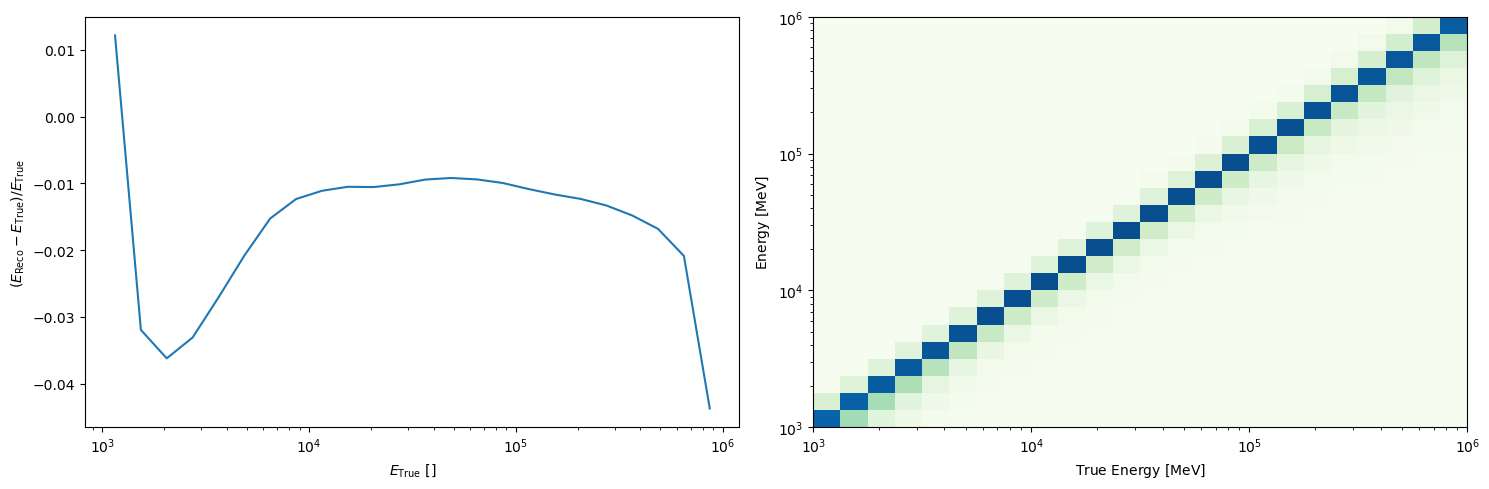

In [38]:
print(generate_3d_dataset.irfs["edisp_kernel"])
generate_3d_dataset.irfs["edisp_kernel"].peek()

In [39]:
%%time
generate_3d_dataset.load_events(file_list["events_file"])

CPU times: user 37.2 ms, sys: 3.73 ms, total: 41 ms
Wall time: 40.7 ms


### EventList and GTI

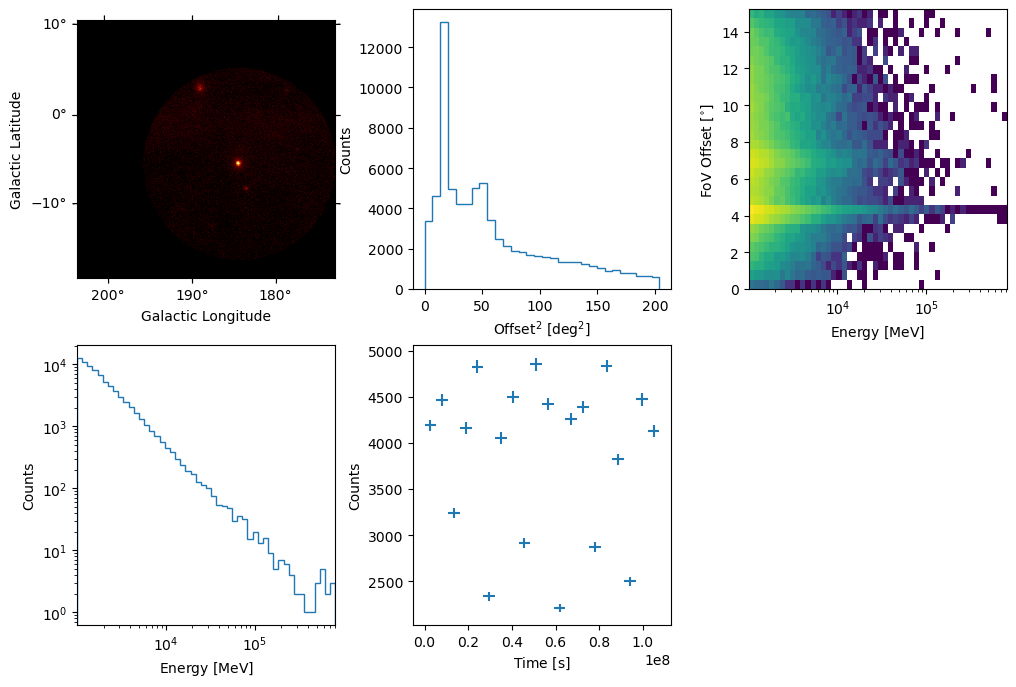

In [40]:
generate_3d_dataset.events["events"].peek()

In [41]:
print(generate_3d_dataset.events["gti"])

GTI info:
- Number of GTIs: 18978
- Duration: 90748484.2994926 s
- Start: 567993605.0 s MET
- Start: 2019-01-01T00:01:09.184 (time standard: TT)
- Stop: 675646997.0852783 s MET
- Stop: 2022-05-30T23:44:21.269 (time standard: TT)



In [42]:
%%time
# Source position from the Events file
center_pos = get_source_position(
    target_region=generate_3d_dataset.config_target,
    fits_header=generate_3d_dataset.events["event_fits"][1].header,
)
print(center_pos)

{'center': <SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (83.633, 22.02)>, 'radius': 11.10660172}
CPU times: user 4.98 ms, sys: 2.63 ms, total: 7.61 ms
Wall time: 2.53 ms


## Create the Counts Map

In [43]:
%%time
generate_3d_dataset.events["counts_map"] = create_counts_map(
    geom_config=generate_3d_dataset.config_3d_dataset.dataset_info.geom,
    center_pos=center_pos,
)
generate_3d_dataset.events["counts_map"].fill_by_coord(
    {
        "skycoord": generate_3d_dataset.events["events"].radec,
        "energy": generate_3d_dataset.events["events"].energy,
        "time": generate_3d_dataset.events["events"].time,
    }
)

CPU times: user 978 ms, sys: 63.5 ms, total: 1.04 s
Wall time: 982 ms


In [44]:
generate_3d_dataset.events["counts_map"]

In [45]:
generate_3d_dataset.events["counts_map"].plot_interactive()

interactive(children=(SelectionSlider(continuous_update=False, description='Select energy:', layout=Layout(wid…

<WCSAxes: >

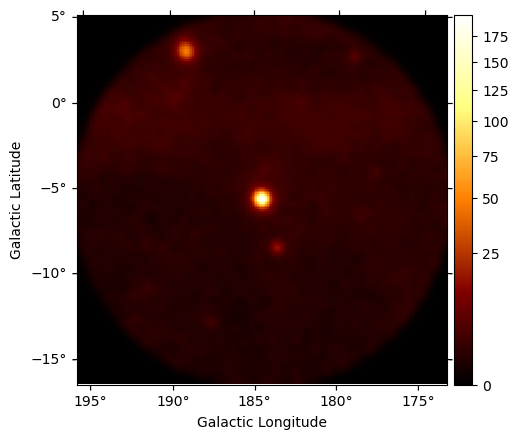

In [46]:
generate_3d_dataset.events["counts_map"].sum_over_axes().smooth(2).plot(stretch="sqrt", add_cbar=True)

### Exclusion mask

In [47]:
%%time
generate_3d_dataset.exclusion_mask = get_exclusion_region_mask(
    exclusion_params=generate_3d_dataset.config_3d_dataset.dataset_info.background.exclusion,
    excluded_geom=generate_3d_dataset.events["counts_map"].geom.copy(),
    exclusion_regions=exclusion_regions,
    config_target=generate_3d_dataset.config_target,
    geom_config=generate_3d_dataset.config_3d_dataset.dataset_info.geom,
    log=generate_3d_dataset.log,
)

CPU times: user 198 ms, sys: 108 ms, total: 307 ms
Wall time: 204 ms


In [48]:
print(generate_3d_dataset.exclusion_mask)

WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat', 'energy']
	shape : (222, 222, 24)
	ndim  : 3
	unit  : 
	dtype : bool



In [49]:
generate_3d_dataset.exclusion_mask.plot_interactive()

interactive(children=(SelectionSlider(continuous_update=False, description='Select energy:', layout=Layout(wid…

### IRF interpolators

In [50]:
%%time
generate_3d_dataset.set_edisp_interpolator()

CPU times: user 2.92 ms, sys: 4.63 ms, total: 7.55 ms
Wall time: 2.36 ms


EDispKernel
-----------

  axes  : ['energy_true', 'energy']
  shape : (24, 24)
  ndim  : 2
  unit  : 
  dtype : float64



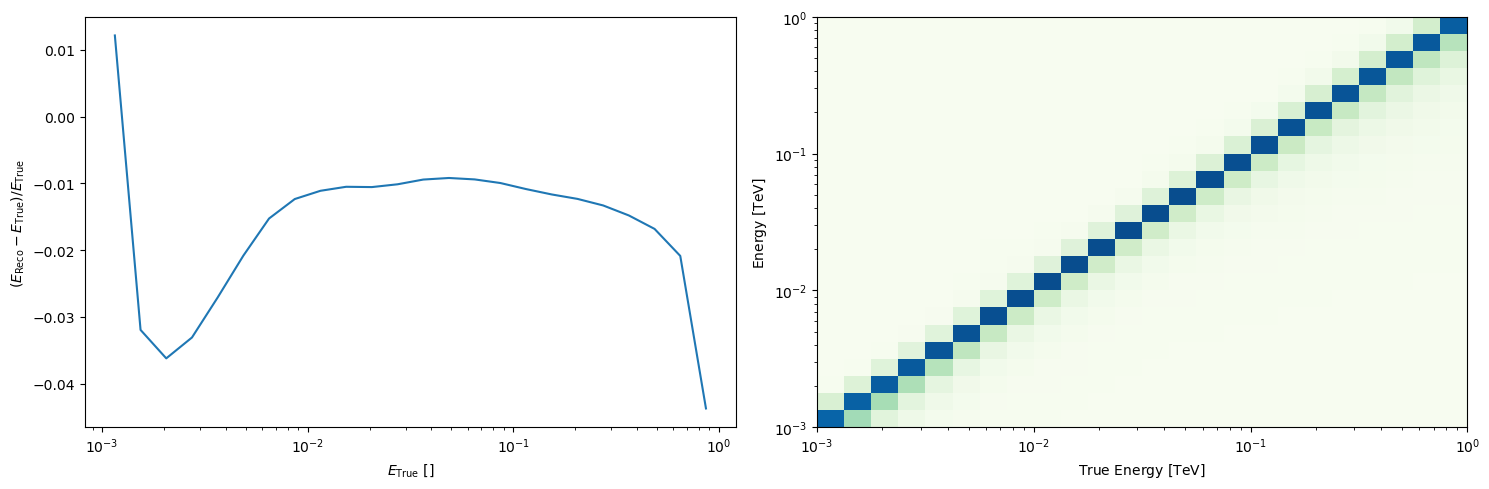

In [51]:
print(generate_3d_dataset.irfs["edisp_interp_kernel"])
generate_3d_dataset.irfs["edisp_interp_kernel"].peek()

In [52]:
%%time
generate_3d_dataset.set_exposure_interpolator()

CPU times: user 375 ms, sys: 42.9 ms, total: 418 ms
Wall time: 417 ms


In [53]:
print(generate_3d_dataset.irfs["exposure_interp"])

WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat', 'energy_true']
	shape : (222, 222, 24)
	ndim  : 3
	unit  : cm2 s
	dtype : float64



### Diffuse background cutout

In [54]:
%%time
generate_3d_dataset.generate_diffuse_background_cutout()

CPU times: user 15.4 ms, sys: 137 μs, total: 15.5 ms
Wall time: 14.9 ms


In [55]:
print(Models(generate_3d_dataset.list_source_models)["diffuse-iem"])

SkyModel

  Name                      : diffuse-iem
  Datasets names            : None
  Spectral model type       : PowerLawNormSpectralModel
  Spatial  model type       : TemplateSpatialModel
  Temporal model type       : 
  Parameters:
    norm                          :      1.000   +/-    0.00             
    tilt                  (frozen):      0.000                   
    reference             (frozen):      1.000       TeV         
    lon_0                 (frozen):    187.750       deg         
    lat_0                 (frozen):     -5.812       deg         




In [56]:
print(generate_3d_dataset.diffuse_models["gal_diffuse_cutout"])

SkyModel

  Name                      : diffuse-iem
  Datasets names            : None
  Spectral model type       : PowerLawNormSpectralModel
  Spatial  model type       : TemplateSpatialModel
  Temporal model type       : 
  Parameters:
    norm                          :      1.000   +/-    0.00             
    tilt                  (frozen):      0.000                   
    reference             (frozen):      1.000       TeV         
    lon_0                 (frozen):    187.750       deg         
    lat_0                 (frozen):     -5.812       deg         




# Apply Exclusion mask to models

In [57]:
generate_3d_dataset.list_source_models = apply_selection_mask_to_models(
    generate_3d_dataset.list_source_models,
    target_source=generate_3d_dataset.config_target.source_name,
    selection_mask=generate_3d_dataset.exclusion_mask,
)

In [58]:
for m in generate_3d_dataset.list_source_models:
    print(m)

SkyModel

  Name                      : 4FGL J0534.5+2201i
  Datasets names            : None
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   1.00e-06   +/- 1.5e-07 1 / (TeV s cm2)
    reference             (frozen):      0.015       TeV         
    alpha                         :      1.700   +/-    0.10             
    beta                          :      0.100   +/-    0.00             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):    184.553       deg         
    lat_0                 (frozen):     -5.781       deg         
    sigma                 (frozen):      0.020       deg         
    e                     (frozen):      0.000                   
    phi                   (frozen):      0.000       deg         


Sky

### Produce MapDataset

In [59]:
%%time
dataset = generate_3d_dataset.generate_dataset(key_names[0])

Using the exclusion mask to create a safe mask


CPU times: user 2.64 ms, sys: 2.18 ms, total: 4.82 ms
Wall time: 4.34 ms


In [60]:
print(dataset)

MapDataset
----------

  Name                            : Fermi-LAT_00 

  Total counts                    : 23266 
  Total background counts         : nan
  Total excess counts             : nan

  Predicted counts                : nan
  Predicted background counts     : nan
  Predicted excess counts         : nan

  Exposure min                    : 5.80e+10 cm2 s
  Exposure max                    : 7.19e+10 cm2 s

  Number of total bins            : 1182816 
  Number of fit bins              : 186744 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0




In [61]:
for m in generate_3d_dataset.list_source_models:
    print(m)

SkyModel

  Name                      : 4FGL J0534.5+2201i
  Datasets names            : None
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   1.00e-06   +/- 1.5e-07 1 / (TeV s cm2)
    reference             (frozen):      0.015       TeV         
    alpha                         :      1.700   +/-    0.10             
    beta                          :      0.100   +/-    0.00             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):    184.553       deg         
    lat_0                 (frozen):     -5.781       deg         
    sigma                 (frozen):      0.020       deg         
    e                     (frozen):      0.000                   
    phi                   (frozen):      0.000       deg         


Sky

# Assigning models to the dataset

In [62]:
%%time
dataset.models = generate_3d_dataset.list_source_models

CPU times: user 448 ms, sys: 4.38 ms, total: 453 ms
Wall time: 452 ms


In [63]:
%%time
print(dataset)

/home/chaitanya/mambaforge/envs/asgardpy/lib/python3.12/site-packages/gammapy/utils/interpolation.py:200: RuntimeWarning: overflow encountered in exp
  output = np.exp(values)


MapDataset
----------

  Name                            : Fermi-LAT_00 

  Total counts                    : 23266 
  Total background counts         : nan
  Total excess counts             : nan

  Predicted counts                : 27155.04
  Predicted background counts     : nan
  Predicted excess counts         : 27155.04

  Exposure min                    : 5.80e+10 cm2 s
  Exposure max                    : 7.19e+10 cm2 s

  Number of total bins            : 1182816 
  Number of fit bins              : 186744 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : 23288.57

  Number of models                : 10 
  Number of parameters            : 59
  Number of free parameters       : 22

  Component 0: SkyModel
  
    Name                      : 4FGL J0534.5+2201i
    Datasets names            : None
    Spectral model type       : CompoundSpectralModel
    Spatial  model type       : GaussianSpatialModel
    Temporal model type       : 
    Parameters:
 

# Some basic plots from the Dataset

In [64]:
dataset.mask_safe.plot_interactive()

interactive(children=(SelectionSlider(continuous_update=False, description='Select energy:', layout=Layout(wid…

Text(0.5, 1.0, 'CountsMap')

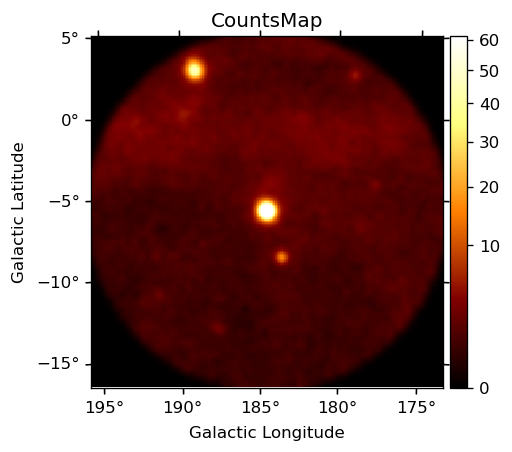

In [65]:
fig = plt.figure(figsize=(6, 3.8), dpi=120)
vmin, vmax = np.percentile(dataset.counts.sum_over_axes().smooth("0.1 deg").data, [5, 99.9])
ax = (
    dataset.counts.sum_over_axes()
    .smooth("0.2 deg")
    .plot(
        vmin=vmin,
        vmax=vmax,
        add_cbar=True,
        stretch="sqrt",
    )
)
ax.set_title("CountsMap")

<Axes: xlabel='Energy [$\\mathrm{TeV}$]', ylabel='Residuals (data - model)'>

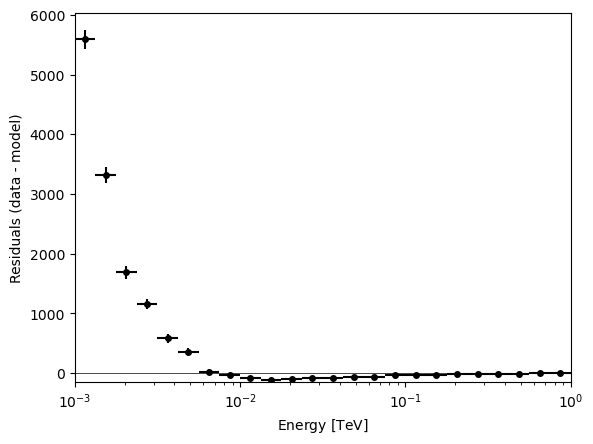

In [66]:
dataset.plot_residuals_spectral()

<WCSAxes: >

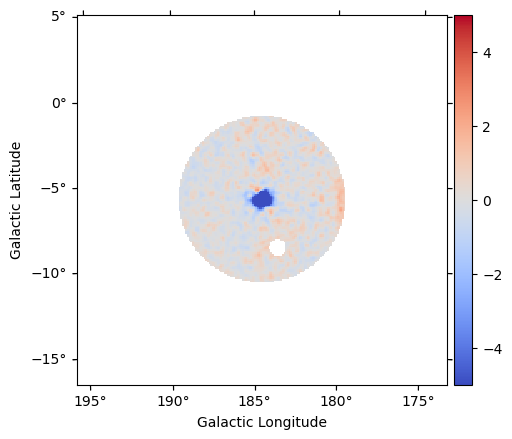

In [67]:
dataset.plot_residuals_spatial()

In [68]:
dataset.info_dict()

{'name': 'Fermi-LAT_00',
 'counts': 23266,
 'excess': nan,
 'sqrt_ts': nan,
 'background': nan,
 'npred': 27155.042823345564,
 'npred_background': nan,
 'npred_signal': 27155.042823345564,
 'exposure_min': <Quantity 5.79582612e+10 cm2 s>,
 'exposure_max': <Quantity 7.18732788e+10 cm2 s>,
 'livetime': <Quantity nan s>,
 'ontime': <Quantity 90748484.2994926 s>,
 'counts_rate': <Quantity nan 1 / s>,
 'background_rate': <Quantity nan 1 / s>,
 'excess_rate': <Quantity nan 1 / s>,
 'n_bins': 1182816,
 'n_fit_bins': 186744,
 'stat_type': 'cash',
 'stat_sum': 23288.57064332735}

/home/chaitanya/mambaforge/envs/asgardpy/lib/python3.12/site-packages/regions/shapes/ellipse.py:209: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return Ellipse(xy=xy, width=width, height=height, angle=angle,
/home/chaitanya/mambaforge/envs/asgardpy/lib/python3.12/site-packages/regions/shapes/rectangle.py:205: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return Rectangle(xy=xy, width=width, height=height,


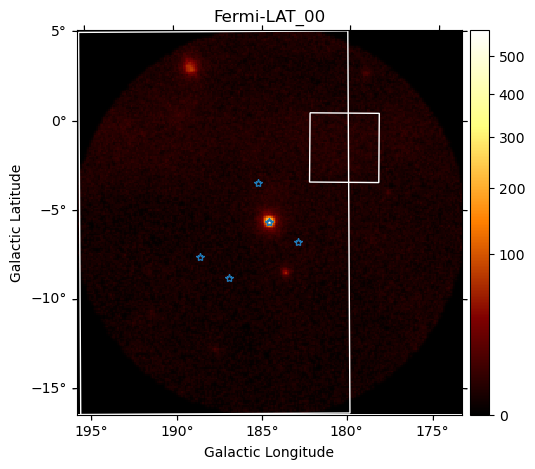

In [69]:
plt.figure(figsize=(8, 5))
axs = plt.subplot(111, projection=dataset.counts.geom.wcs)

dataset.counts.sum_over_axes().smooth(0.05 * u.deg).plot(ax=axs, stretch="sqrt", add_cbar=True, cmap="afmhot")
dataset.models.plot_regions(ax=axs, color="white")
axs.set_title(dataset.name)

plt.show()

In [70]:
dataset.exposure.plot_interactive(add_cbar=True)

interactive(children=(SelectionSlider(continuous_update=False, description='Select energy_true:', layout=Layou…

<Axes: xlabel='True Energy [$\\mathrm{MeV}$]', ylabel='Containment radius [$\\mathrm{{}^{\\circ}}$]'>

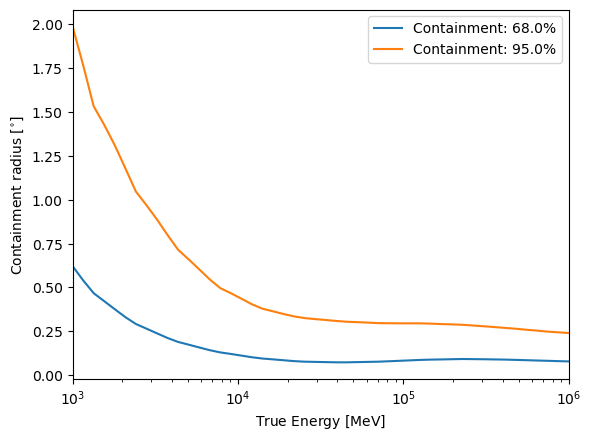

In [71]:
dataset.psf.plot_containment_radius_vs_energy()

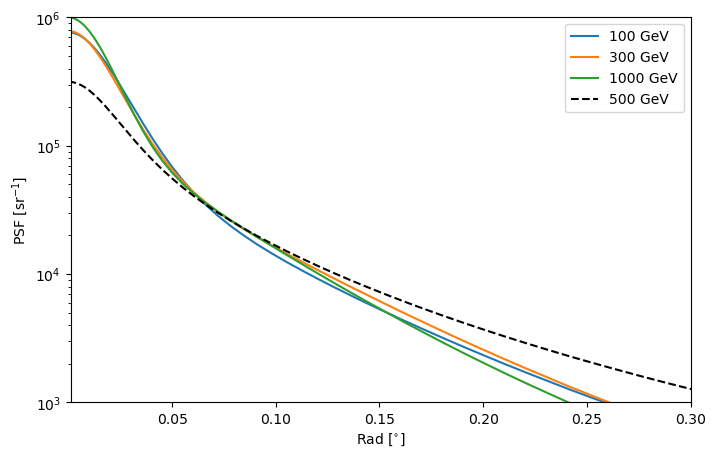

In [72]:
plt.figure(figsize=(8, 5))

energy = [100, 300, 1000] * u.GeV
dataset.psf.plot_psf_vs_rad(energy_true=energy)

spectral_model = PowerLawSpectralModel(index=1.25)
psf_mean = dataset.psf.to_image(spectral_model=spectral_model)
psf_mean.plot_psf_vs_rad(c="k", ls="--", energy_true=[500] * u.GeV)

plt.xlim(1e-3, 0.3)
plt.ylim(1e3, 1e6)
plt.legend()

In [73]:
radius = dataset.psf.containment_radius(energy_true=1 * u.TeV, fraction=0.95)
print(radius)

[0.23928125] deg


<Axes: xlabel='True Energy [$\\mathrm{TeV}$]', ylabel='Energy [$\\mathrm{TeV}$]'>

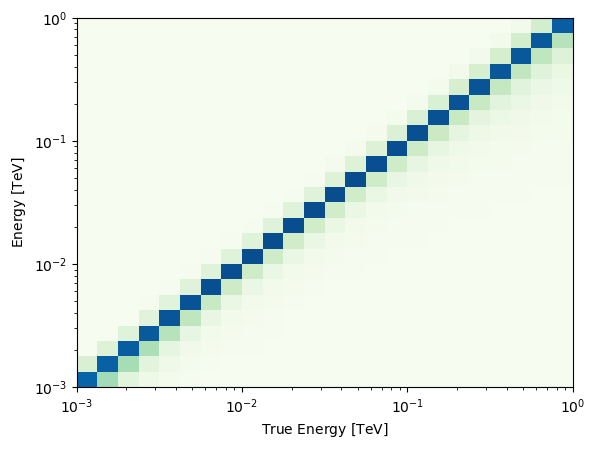

In [74]:
plt.figure()
edisp_kernel = dataset.edisp.get_edisp_kernel()
edisp_kernel.plot_matrix()

<WCSAxes: >

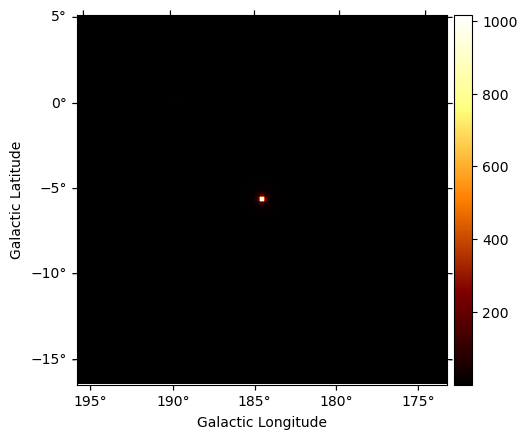

In [75]:
plt.figure()
npred = dataset.npred()
npred.sum_over_axes().plot(add_cbar=True)